In [1]:
import process_helper as proc
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

EXP_TYPE = 'pad'
EXP_NAME = 'shift'
LIST_VALS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

subdir_pattern = '*/*/eval.csv'  # This example finds all .txt files in all subdirectories

list_of_root_dirs_by_augment_degree = proc.generate_root_dirs_by_experiment_and_augment_degree_new(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='walker_run',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_dict = proc.load_datasets_by_directory(list_of_root_dirs_by_augment_degree, subdir_pattern, show=False)

In [2]:
for root_directory in list_of_root_dirs_by_augment_degree:
    print(root_directory, ' : ' ,len(datasets_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-0  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-1  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-2  :  9
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-3  :  9
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-4  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-5  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-6  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-7  :  10
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-8  :  10
/Users/victor/Documen

In [3]:
column_name = 'episode_reward'
result_stats = proc.generate_stats_for_directories(list_of_root_dirs_by_augment_degree, datasets_dict, column_name)
summary_statistics = proc.compute_summary_stats(result_stats)

for key, stats in summary_statistics.items():
    print(f"Directory: {key}")
    print("Sum Statistics:", stats['Sum Statistics'])
    print("Max Statistics:", stats['Max Statistics'])


print("\n...printing Mean over Sums")
mean_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=True)

print("\n...printing Max over Sums")
max_vals_over_sums_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')
sorted_items = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=True)



print("\n...printing Max over Maxes")
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')
sorted_items = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=True)

print("\n...printing Mean over Maxes")
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
sorted_items = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=True)


Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-0
Sum Statistics: {'Sum Min': 3277.230568518176, 'Sum Max': 10677.058473527912, 'Sum Mean': 7774.683567107964}
Max Statistics: {'Max Min': 33.76868694583019, 'Max Max': 145.92228642253485, 'Max Mean': 90.26684560289814}
Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-1
Sum Statistics: {'Sum Min': 6493.149189998693, 'Sum Max': 30414.1052310071, 'Sum Mean': 22715.404487664808}
Max Statistics: {'Max Min': 83.66324949785395, 'Max Max': 432.5929447162256, 'Max Mean': 315.63372766120085}
Directory: /Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run/drqv2_aug_pixels-True-shift-2
Sum Statistics: {'Sum Min': 26184.59505895038, 'Sum Max': 40333.29150154297, 'Sum Mean': 32177.658234233346}
Max Statistics: {'Max Min': 332.39003949409505, 'Max Max': 526.1498521731214, 'Max Mean': 421.319085778175}
Directory

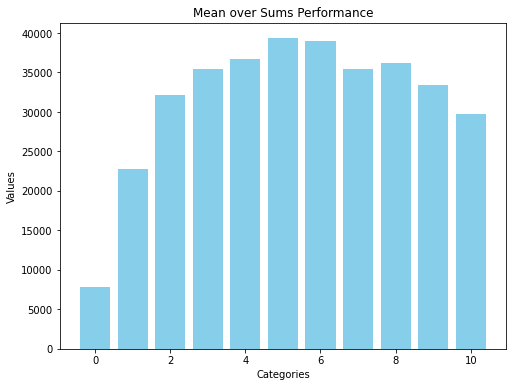

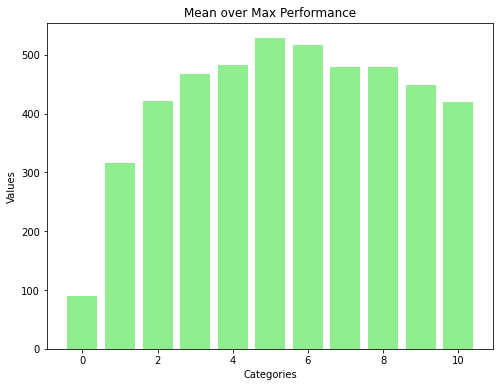

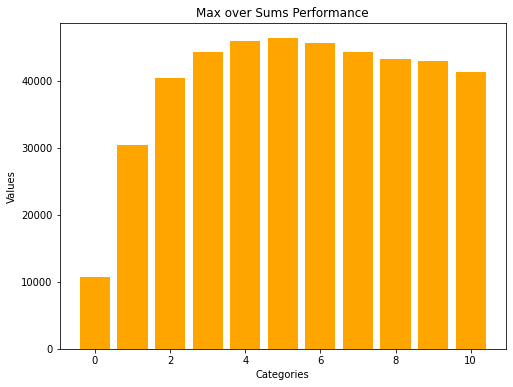

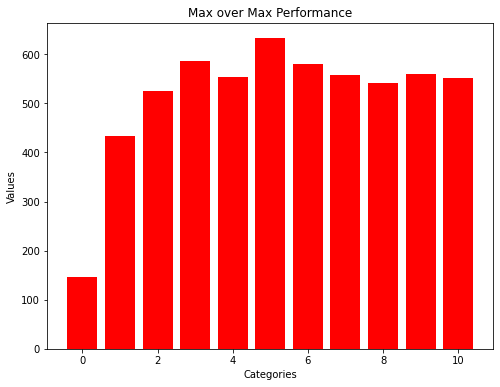

In [4]:
categories = list(mean_vals_over_sums_performance.keys())
mean_sums_values = list(mean_vals_over_sums_performance.values())
mean_max_values = list(mean_vals_over_max_performance.values())
max_sums_values = list(max_vals_over_sums_performance.values())
max_max_values = list(max_vals_over_max_performance.values())

# Plot for mean_sums_values
plt.figure(figsize=(8, 6))
plt.bar(categories, mean_sums_values, color='skyblue')
plt.title('Mean over Sums Performance')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Plot for mean_max_values
plt.figure(figsize=(8, 6))
plt.bar(categories, mean_max_values, color='lightgreen')
plt.title('Mean over Max Performance')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Plot for max_sums_values
plt.figure(figsize=(8, 6))
plt.bar(categories, max_sums_values, color='orange')
plt.title('Max over Sums Performance')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Plot for max_max_values
plt.figure(figsize=(8, 6))
plt.bar(categories, max_max_values, color='red')
plt.title('Max over Max Performance')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


...printing Max over Maxes


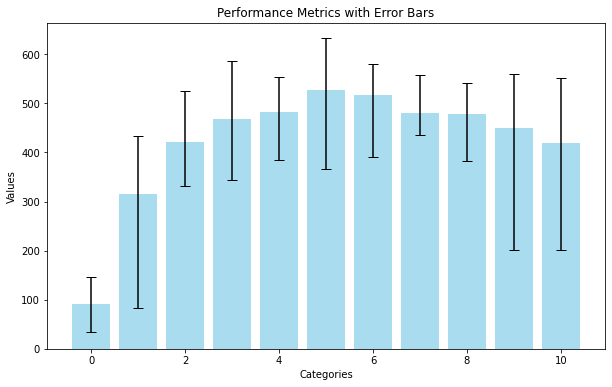

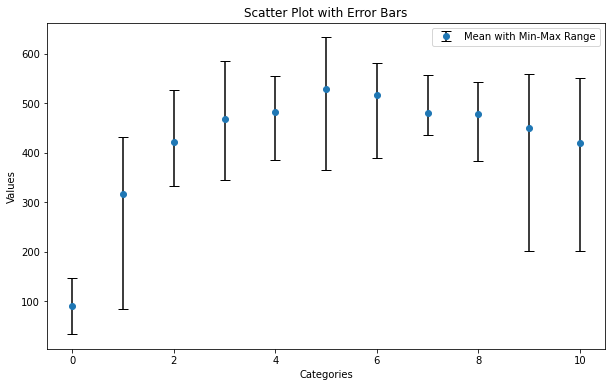

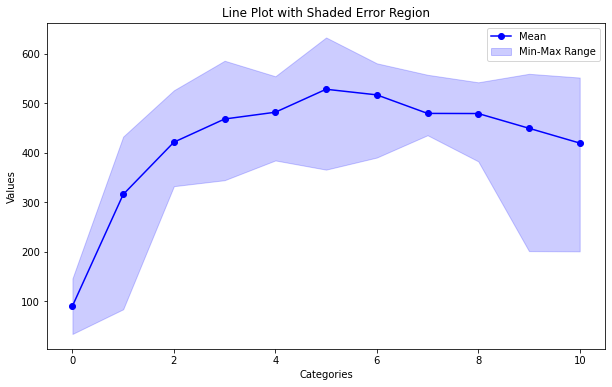


...printing Max over Maxes


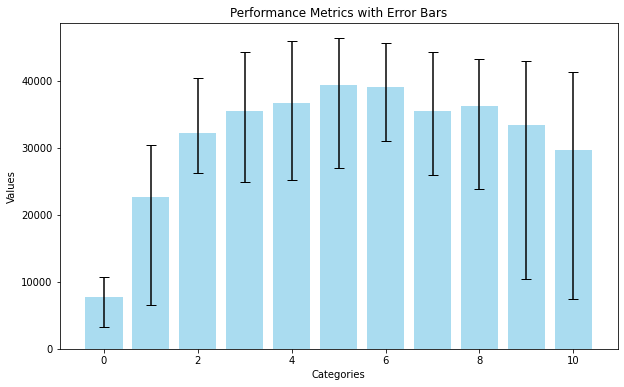

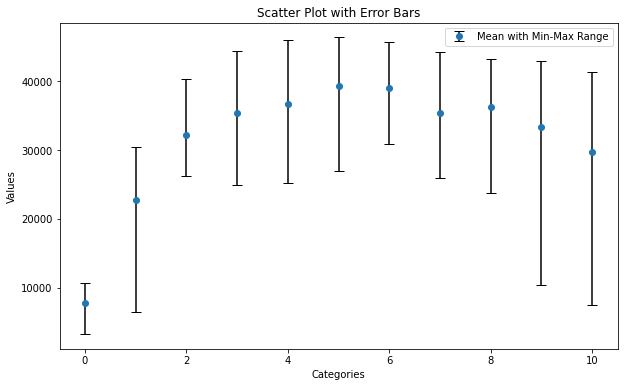

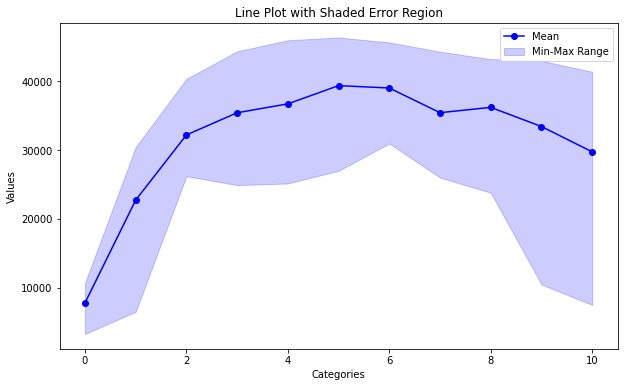

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with mean, min, and max values for each category
print("\n...printing Max over Maxes")
min_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Min', stat_type='Max Statistics')
mean_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Mean', stat_type='Max Statistics')
max_vals_over_max_performance = proc.extract_stat(summary_statistics, stat_name='Max Max', stat_type='Max Statistics')

categories = list(max_vals_over_max_performance.keys())
mean_vals = list(mean_vals_over_max_performance.values())
min_vals = list(min_vals_over_max_performance.values())
max_vals = list(max_vals_over_max_performance.values())

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_vals) - np.array(min_vals)
upper_error = np.array(max_vals) - np.array(mean_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_vals, max_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()




# Sample data with mean, min, and max values for each category
print("\n...printing Max over Maxes")
min_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Min', stat_type='Sum Statistics')
mean_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Mean', stat_type='Sum Statistics')
max_vals_over_sum_performance = proc.extract_stat(summary_statistics, stat_name='Sum Max', stat_type='Sum Statistics')

categories = list(min_vals_over_sum_performance.keys())
mean_sum_vals = list(mean_vals_over_sum_performance.values())
min_sum_vals = list(min_vals_over_sum_performance.values())
max_sum_vals = list(max_vals_over_sum_performance.values())

# Calculate error values (difference between mean and min/max)
lower_error = np.array(mean_sum_vals) - np.array(min_sum_vals)
upper_error = np.array(max_sum_vals) - np.array(mean_sum_vals)
errors = [lower_error, upper_error]

# Plotting the bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(categories, mean_sum_vals, yerr=errors, capsize=5, color='skyblue', alpha=0.7, ecolor='black')
plt.title('Performance Metrics with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()


# Scatter Plot with Error Bars
plt.figure(figsize=(10, 6))
plt.errorbar(categories, mean_sum_vals, yerr=errors, fmt='o', ecolor='black', capsize=5, label='Mean with Min-Max Range')
plt.title('Scatter Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

# Line Plot with Shaded Error Region
plt.figure(figsize=(10, 6))
plt.plot(categories, mean_sum_vals, marker='o', color='b', label='Mean')
plt.fill_between(categories, min_sum_vals, max_sum_vals, color='b', alpha=0.2, label='Min-Max Range')
plt.title('Line Plot with Shaded Error Region')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()
plt.show()

In [8]:
subdir_pattern = '*/*/augment.csv'
EXP_NAME = 'shift'

list_of_root_dirs_by_augment_stats = proc.generate_root_dirs_by_experiment_and_augment_degree_new_augment_stats(
    exp_main_folder='exp-' + EXP_TYPE, 
    exp_name='walker_run_augment_stats',  
    agent_name='drqv2_aug_pixels-True-' + EXP_NAME + '-', 
    list_vals=LIST_VALS)

datasets_augstats_dict = proc.load_datasets_by_directory(
    list_of_root_dirs_by_augment_stats, subdir_pattern, show=False)


for root_directory in list_of_root_dirs_by_augment_stats:
    print(root_directory, ' : ' ,len(datasets_augstats_dict[root_directory]))

/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-0  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-1  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-2  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-3  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-4  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-5  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-6  :  1
/Users/victor/Documents/python-projects/smart-rl/exp-pad/exp/walker_run_augment_stats/drqv2_aug_pixels-True-shift-7  :  1
/Users/victor/Documents/

In [9]:
stats_column_names = [
        "manhattan",
        "kl_div",
        "hamming",
        "euclidian",
        "chebyshev",
        "cosine_dist",
        "bhattacharyya"
]

sorted_mean_vals_over_sums_performance = proc.print_sorted(mean_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_sums_performance = proc.print_sorted(max_vals_over_sums_performance, sort_by='value', desc=False, print_it=False)
sorted_mean_vals_over_max_performance = proc.print_sorted(mean_vals_over_max_performance, sort_by='value', desc=False, print_it=False)
sorted_max_vals_over_max_performance = proc.print_sorted(max_vals_over_max_performance, sort_by='value', desc=False, print_it=False)


for distance in stats_column_names:
    result_stats = proc.generate_stats_for_augment_stats_directories(list_of_root_dirs_by_augment_stats, datasets_augstats_dict, distance)
    mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
    sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

    print("\n", distance)
    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

    correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
    print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)
    print()



 manhattan
Pearson correlation coefficient (means over sums): 0.9251089780776417
Pearson correlation coefficient (maxes over sums): 0.9251089780776417
Pearson correlation coefficient (means over maxes): 0.9654422196850958
Pearson correlation coefficient (maxes over maxes): 0.9654422196850958


 kl_div
Pearson correlation coefficient (means over sums): 0.8957090089813459
Pearson correlation coefficient (maxes over sums): 0.8957090089813459
Pearson correlation coefficient (means over maxes): 0.9374929839625832
Pearson correlation coefficient (maxes over maxes): 0.9374929839625832


 hamming
Pearson correlation coefficient (means over sums): 0.921240965753449
Pearson correlation coefficient (maxes over sums): 0.921240965753449
Pearson correlation coefficient (means over maxes): 0.9553473037226156
Pearson correlation coefficient (maxes over maxes): 0.9553473037226156


 euclidian
Pearson correlation coefficient (means over sums): 0.9310129599898822
Pearson correlation coefficient (maxes o

Pearson correlation coefficient (means over sums): 0.9310129599898822
Pearson correlation coefficient (maxes over sums): 0.9310129599898822
Pearson correlation coefficient (means over maxes): 0.9673574850369157
Pearson correlation coefficient (maxes over maxes): 0.9673574850369157


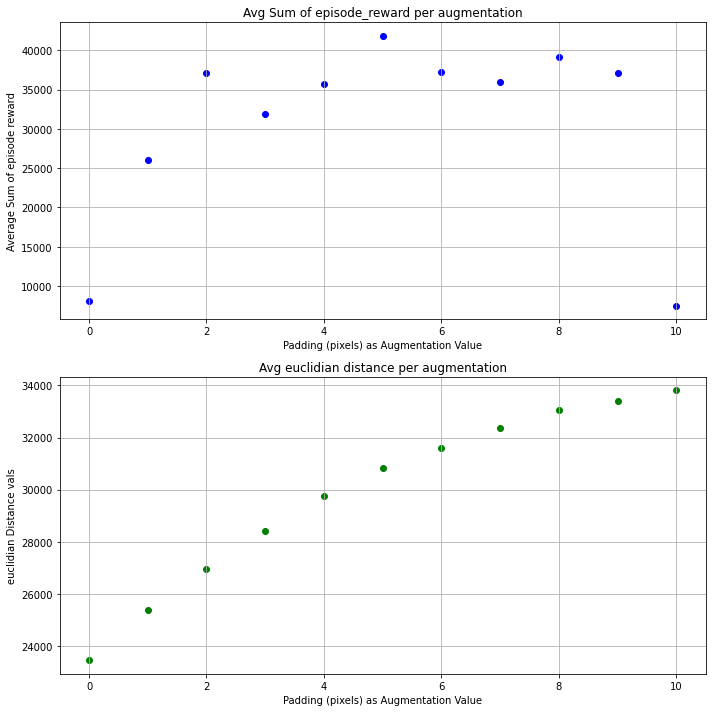

In [10]:
stats_distance_name = 'euclidian'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)



correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)


proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.7079099921941207
Pearson correlation coefficient (maxes over sums): 0.7079099921941207
Pearson correlation coefficient (means over maxes): 0.7613023021818555
Pearson correlation coefficient (maxes over maxes): 0.7613023021818555


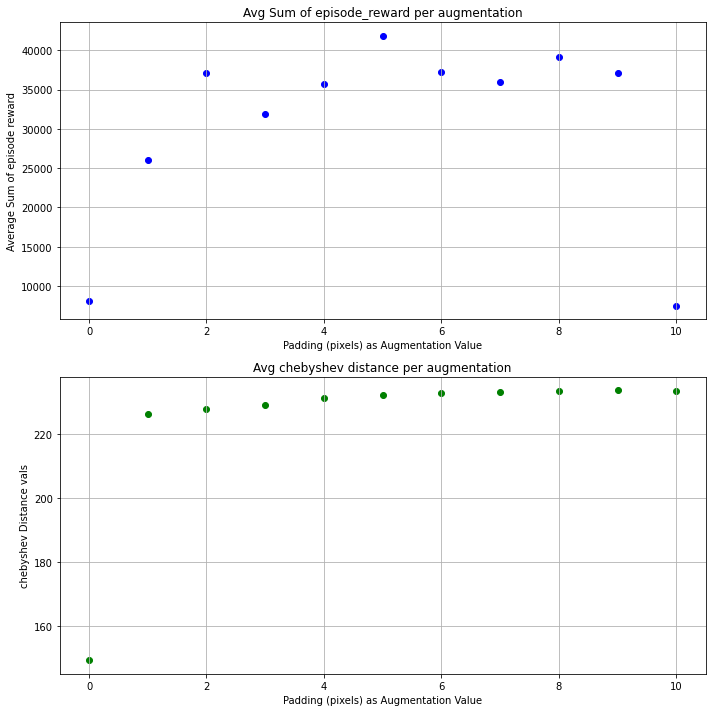

In [11]:
stats_distance_name = 'chebyshev'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)


correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.9149494261298188
Pearson correlation coefficient (maxes over sums): 0.9149494261298188
Pearson correlation coefficient (means over maxes): 0.953769794717729
Pearson correlation coefficient (maxes over maxes): 0.953769794717729


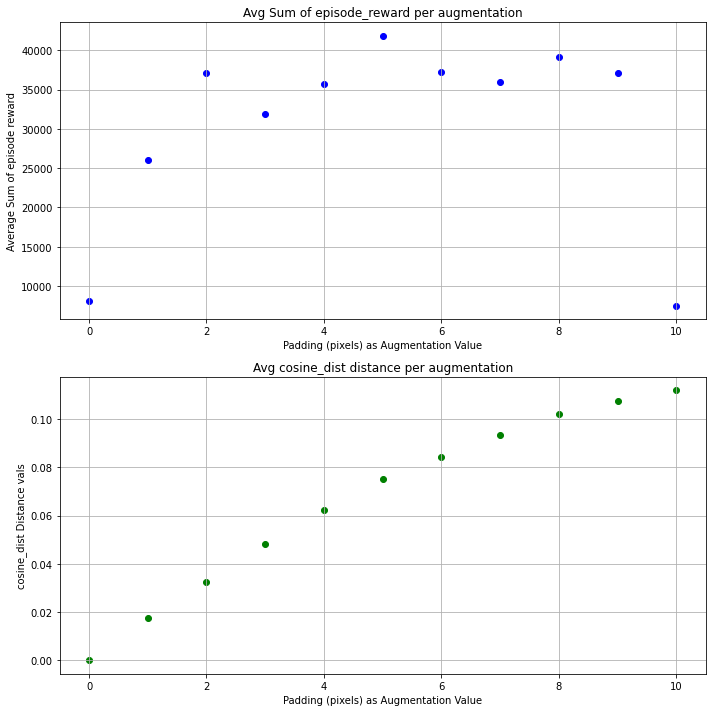

In [12]:
stats_distance_name = 'cosine_dist'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')


Pearson correlation coefficient (means over sums): 0.8807421586415598
Pearson correlation coefficient (maxes over sums): 0.8807421586415598
Pearson correlation coefficient (means over maxes): 0.9242344815671872
Pearson correlation coefficient (maxes over maxes): 0.9242344815671872


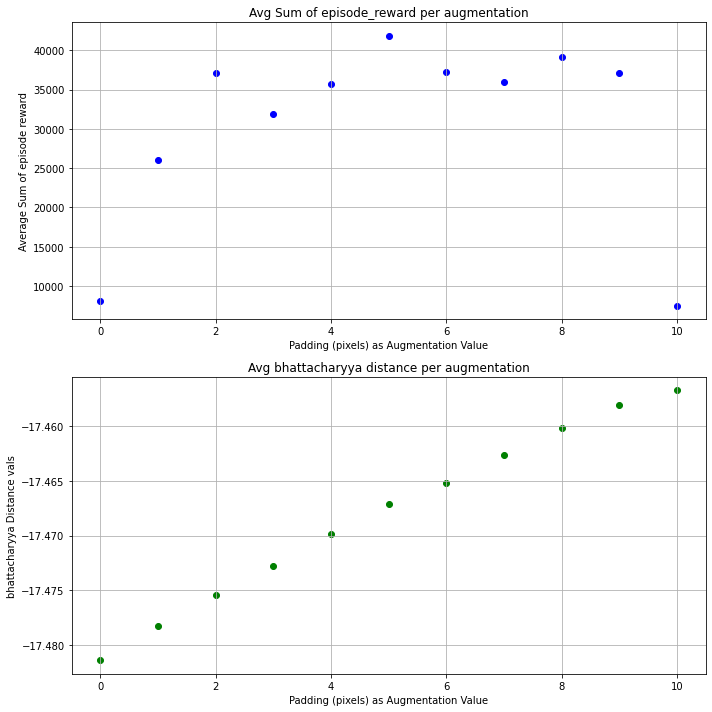

In [13]:
stats_distance_name = 'bhattacharyya'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.921240965753449
Pearson correlation coefficient (maxes over sums): 0.921240965753449
Pearson correlation coefficient (means over maxes): 0.9553473037226156
Pearson correlation coefficient (maxes over maxes): 0.9553473037226156


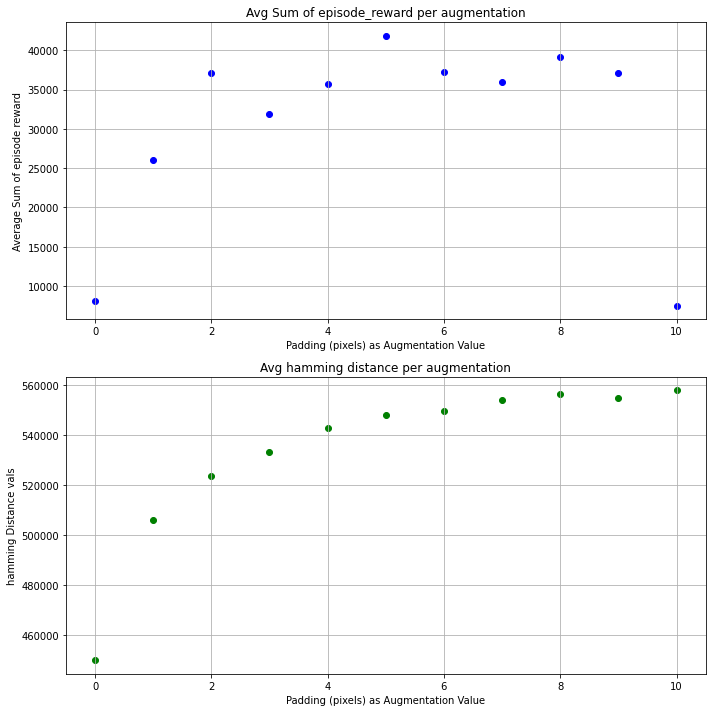

In [14]:
stats_distance_name = 'hamming'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.8957090089813459
Pearson correlation coefficient (maxes over sums): 0.8957090089813459
Pearson correlation coefficient (means over maxes): 0.9374929839625832
Pearson correlation coefficient (maxes over maxes): 0.9374929839625832


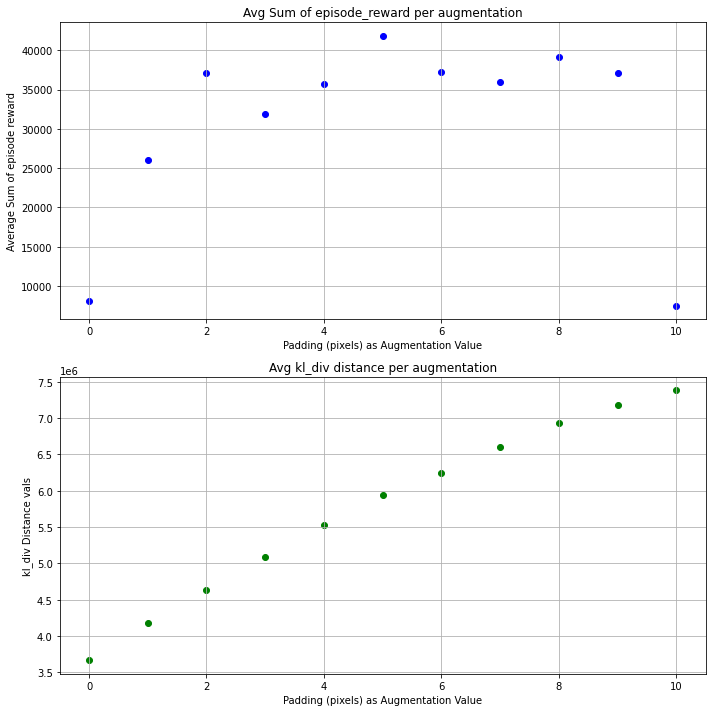

In [15]:
stats_distance_name = 'kl_div'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')

Pearson correlation coefficient (means over sums): 0.9251089780776417
Pearson correlation coefficient (maxes over sums): 0.9251089780776417
Pearson correlation coefficient (means over maxes): 0.9654422196850958
Pearson correlation coefficient (maxes over maxes): 0.9654422196850958


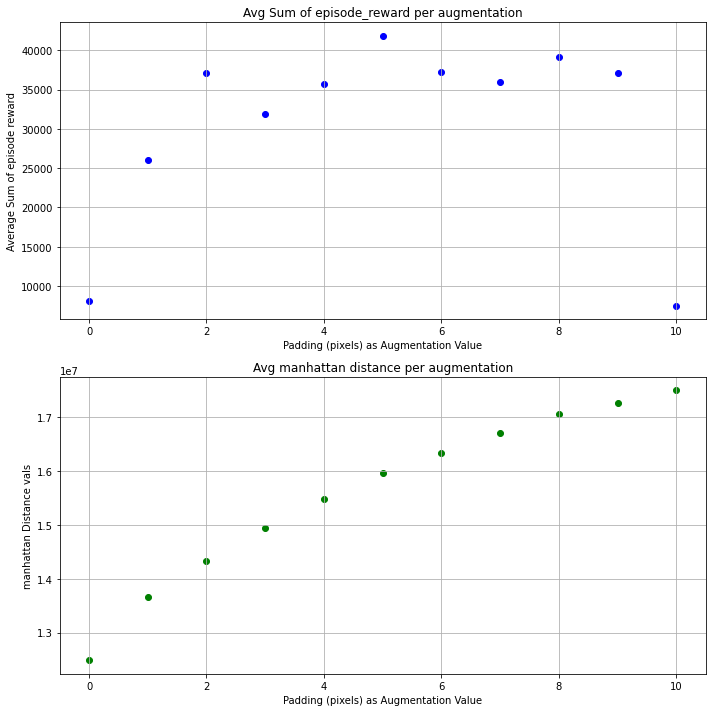

In [16]:
stats_distance_name = 'manhattan'
result_stats = proc.generate_stats_for_augment_stats_directories(
    list_of_root_dirs_by_augment_stats, datasets_augstats_dict, stats_distance_name)
# print(result_stats)

# for key, stats in result_stats.items():
#     print(f"Directory: {key}")
#     print(stats)
#     print()
    
mean_vals_statdistances = proc.extract_stat(result_stats, stat_name='Mean', stat_type=None)
sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_sums_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over sums):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_mean_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (means over maxes):", correlation_coefficient)

correlation_coefficient = proc.compute_correlation(sorted_max_vals_over_max_performance, sorted_items_diststats)
print("Pearson correlation coefficient (maxes over maxes):", correlation_coefficient)


# correlation_coefficient = proc.compute_normalized_correlation(sorted_mean_vals_over_sums_performance, sorted_items_diststats)
# print("Normalized Pearson correlation coefficient:", correlation_coefficient)



sorted_items_diststats = proc.print_sorted(mean_vals_statdistances, sort_by='value', desc=False, print_it=False)
proc.plot_dual_dot_plots(sorted_mean_vals_over_sums_performance, sorted_items_diststats,
                   'Avg Sum of episode_reward per augmentation', 'Avg '+stats_distance_name+' distance per augmentation',
                   'Padding (pixels) as Augmentation Value',
                   'Average Sum of episode reward', stats_distance_name +' Distance vals')